# #04. 다양한 회귀 알고리즘2

## 2. K-최근접 이웃 회귀

> - 주어진 데이터 포인트의 최근접 이웃 K 개를 참조하여 예측값을 결정하는 회귀 기법
> - 즉, 예측 데이터와 가장 가까운 K 개의 학습 데이터의 평균값(y)으로 예측한다.
> - `거리`를 기반으로 하는 모델은 `스케일링`이 필수적이다.

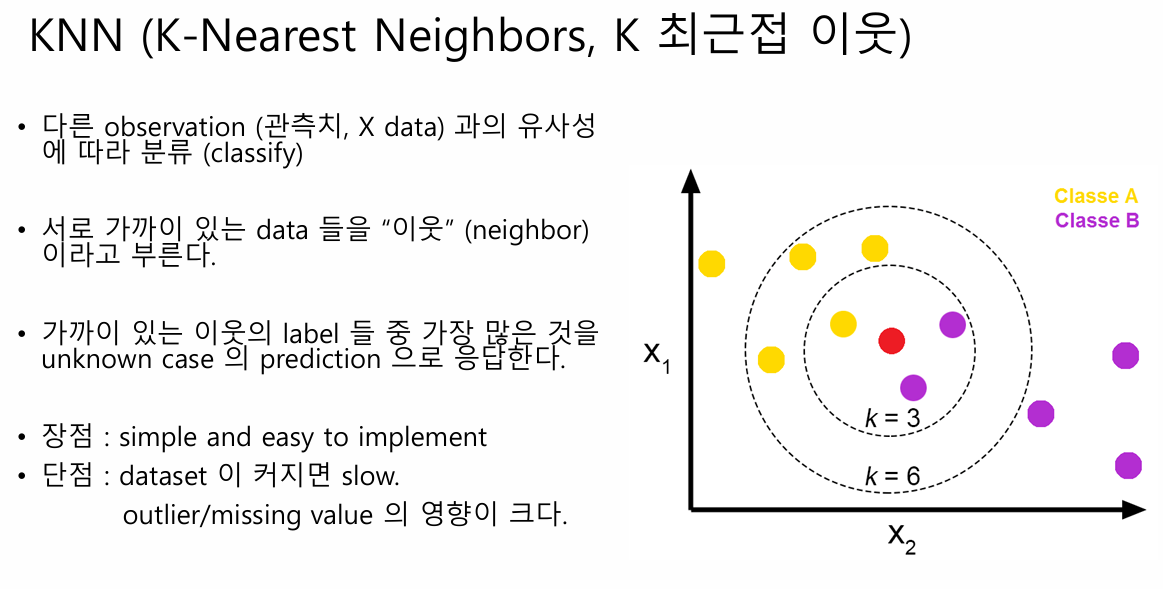

In [3]:
from IPython.display import Image
Image('img/img04_03.png', width=800)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

최적의 K 값 :  11
결정계수 :  0.6805629031793323
평균절대오차 :  0.43843182302677935


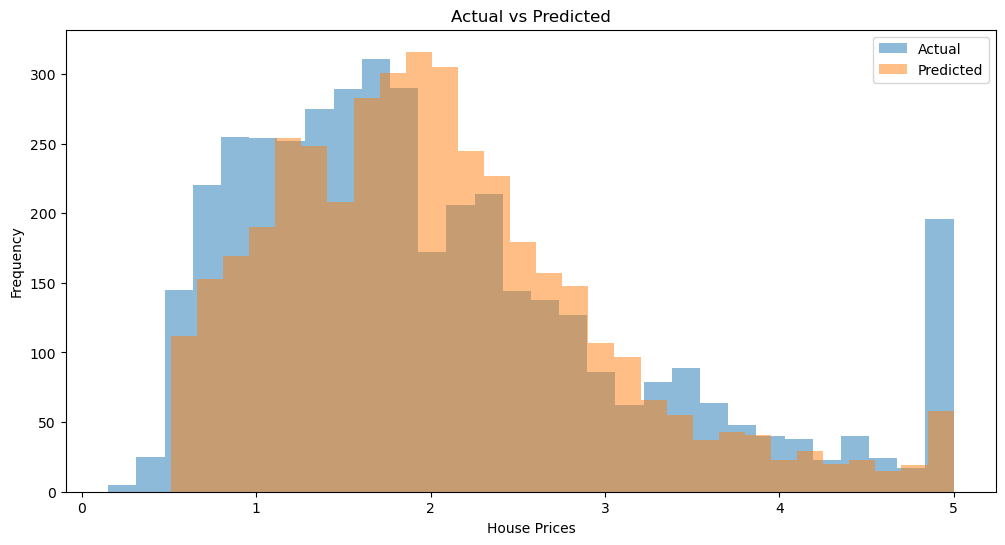

In [8]:
# 캘리포니아 주택 가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타겟 변수를 분리
x, y = california.data, california.target

# 훈련세트와 테스트세트 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 표준화 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성
knn = KNeighborsRegressor()

# 교차 검증
param_grid = {'n_neighbors' : np.arange(1,30)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# 최적의 K 값으로 모델 생성
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
print("최적의 K 값 : " , best_k)

# 테스트 세트에 대한 예측
Y_pred = knn_best.predict(X_test)

# 결정계수 R2
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : " , r2)

# 평균절대오차 MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("평균절대오차 : " , mae)

# 시각화
plt.figure(figsize=(12,6))
# bins : 데이터 구간 30개
plt.hist(Y_test, bins=30, alpha=0.5, label='Actual')
plt.hist(Y_pred, bins=30, alpha=0.5, label='Predicted')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## ====================================================

## 3. SVR ( Support Vector Regression )

> - 원래는 분류 문제를 해결하기 위해서 개발되었으나 회귀문제에도 적용할 수 있음
> - MSE 와 L2 손실을 최소화 하기 위해 스케일링을 해야함


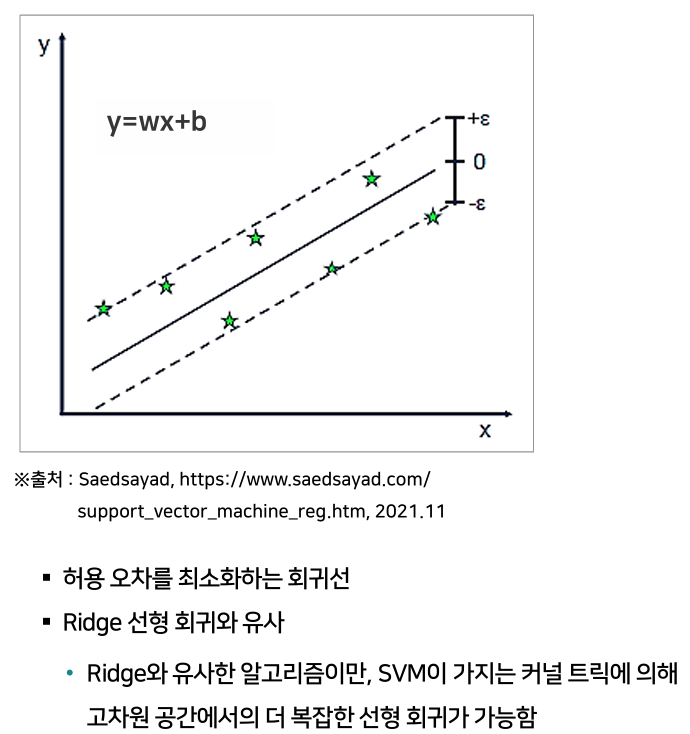

In [9]:
from IPython.display import Image
Image('img/img04_02.png', width=800)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.svm import SVR

결정계수 :  0.727563952473304
평균절대오차 :  0.3985982830145761


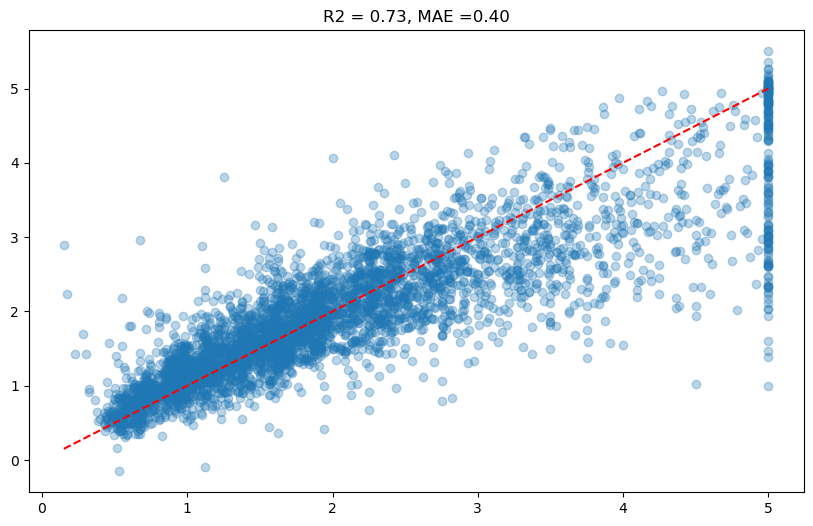

In [15]:
# 캘리포니아 주택 가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타겟 변수를 분리
x, y = california.data, california.target

# 훈련세트와 테스트세트 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 표준화 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성
# kernel : rbf(비선형 데이터를 모델링), linear(선형커널), sigmoid(시그모이드)
# C : 값이 클수록 모델은 오차를 줄이기 위해서 더 많이 노력하지만, 과적합의 위험이 있음
#    (C 값은 모델의 복잡도와 오차 허용 사이의 균형을 조절한다.)
# epsilon : 마진의 너비 (작게 설정하면 더 많은 데이터 포인트를 고려)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)

# 테스트 세트에 대한 예측
Y_pred = svr.predict(X_test)

# 결정계수 R2
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : " , r2)

# 평균절대오차 MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("평균절대오차 : " , mae)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("R2 = {:.2f}, MAE ={:.2f}" .format(r2, mae))
plt.show()